# Week 6<br>Web Scraping

Oct 12, 2022

## Housekeeping

- Homework #3 (required) due on Monday (10/17)
- Homework #4 (optional) assigned 10/17, due in two weeks
- You must complete one of homeworks #4, #5, and #6
- Final project due at the end of the finals period...more details coming soon

## Week 6 agenda: web scraping

**Last time:**
- Why web scraping? 
- Getting familiar with the Web
- Web scraping: extracting data from static sites

**Today:**
- Practice with web scraping
- How to deal with dynamic content

In [159]:
# Start with the usual imports
# We'll use these throughout
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from bs4 import BeautifulSoup
import requests

## Scraping: Adding the User-Agent Header

Many websites will reject a `requests.get()` function call if you do not specify the `User-Agent` header as part of your GET request. This lets the website identify who is making the GET request. You can find your browser's User-Agent value in the "Network" tab of your browser's developer tools. If you click on any request listed on this tab, and go to the "Headers" tab, you should see the "user-agent" value listed:


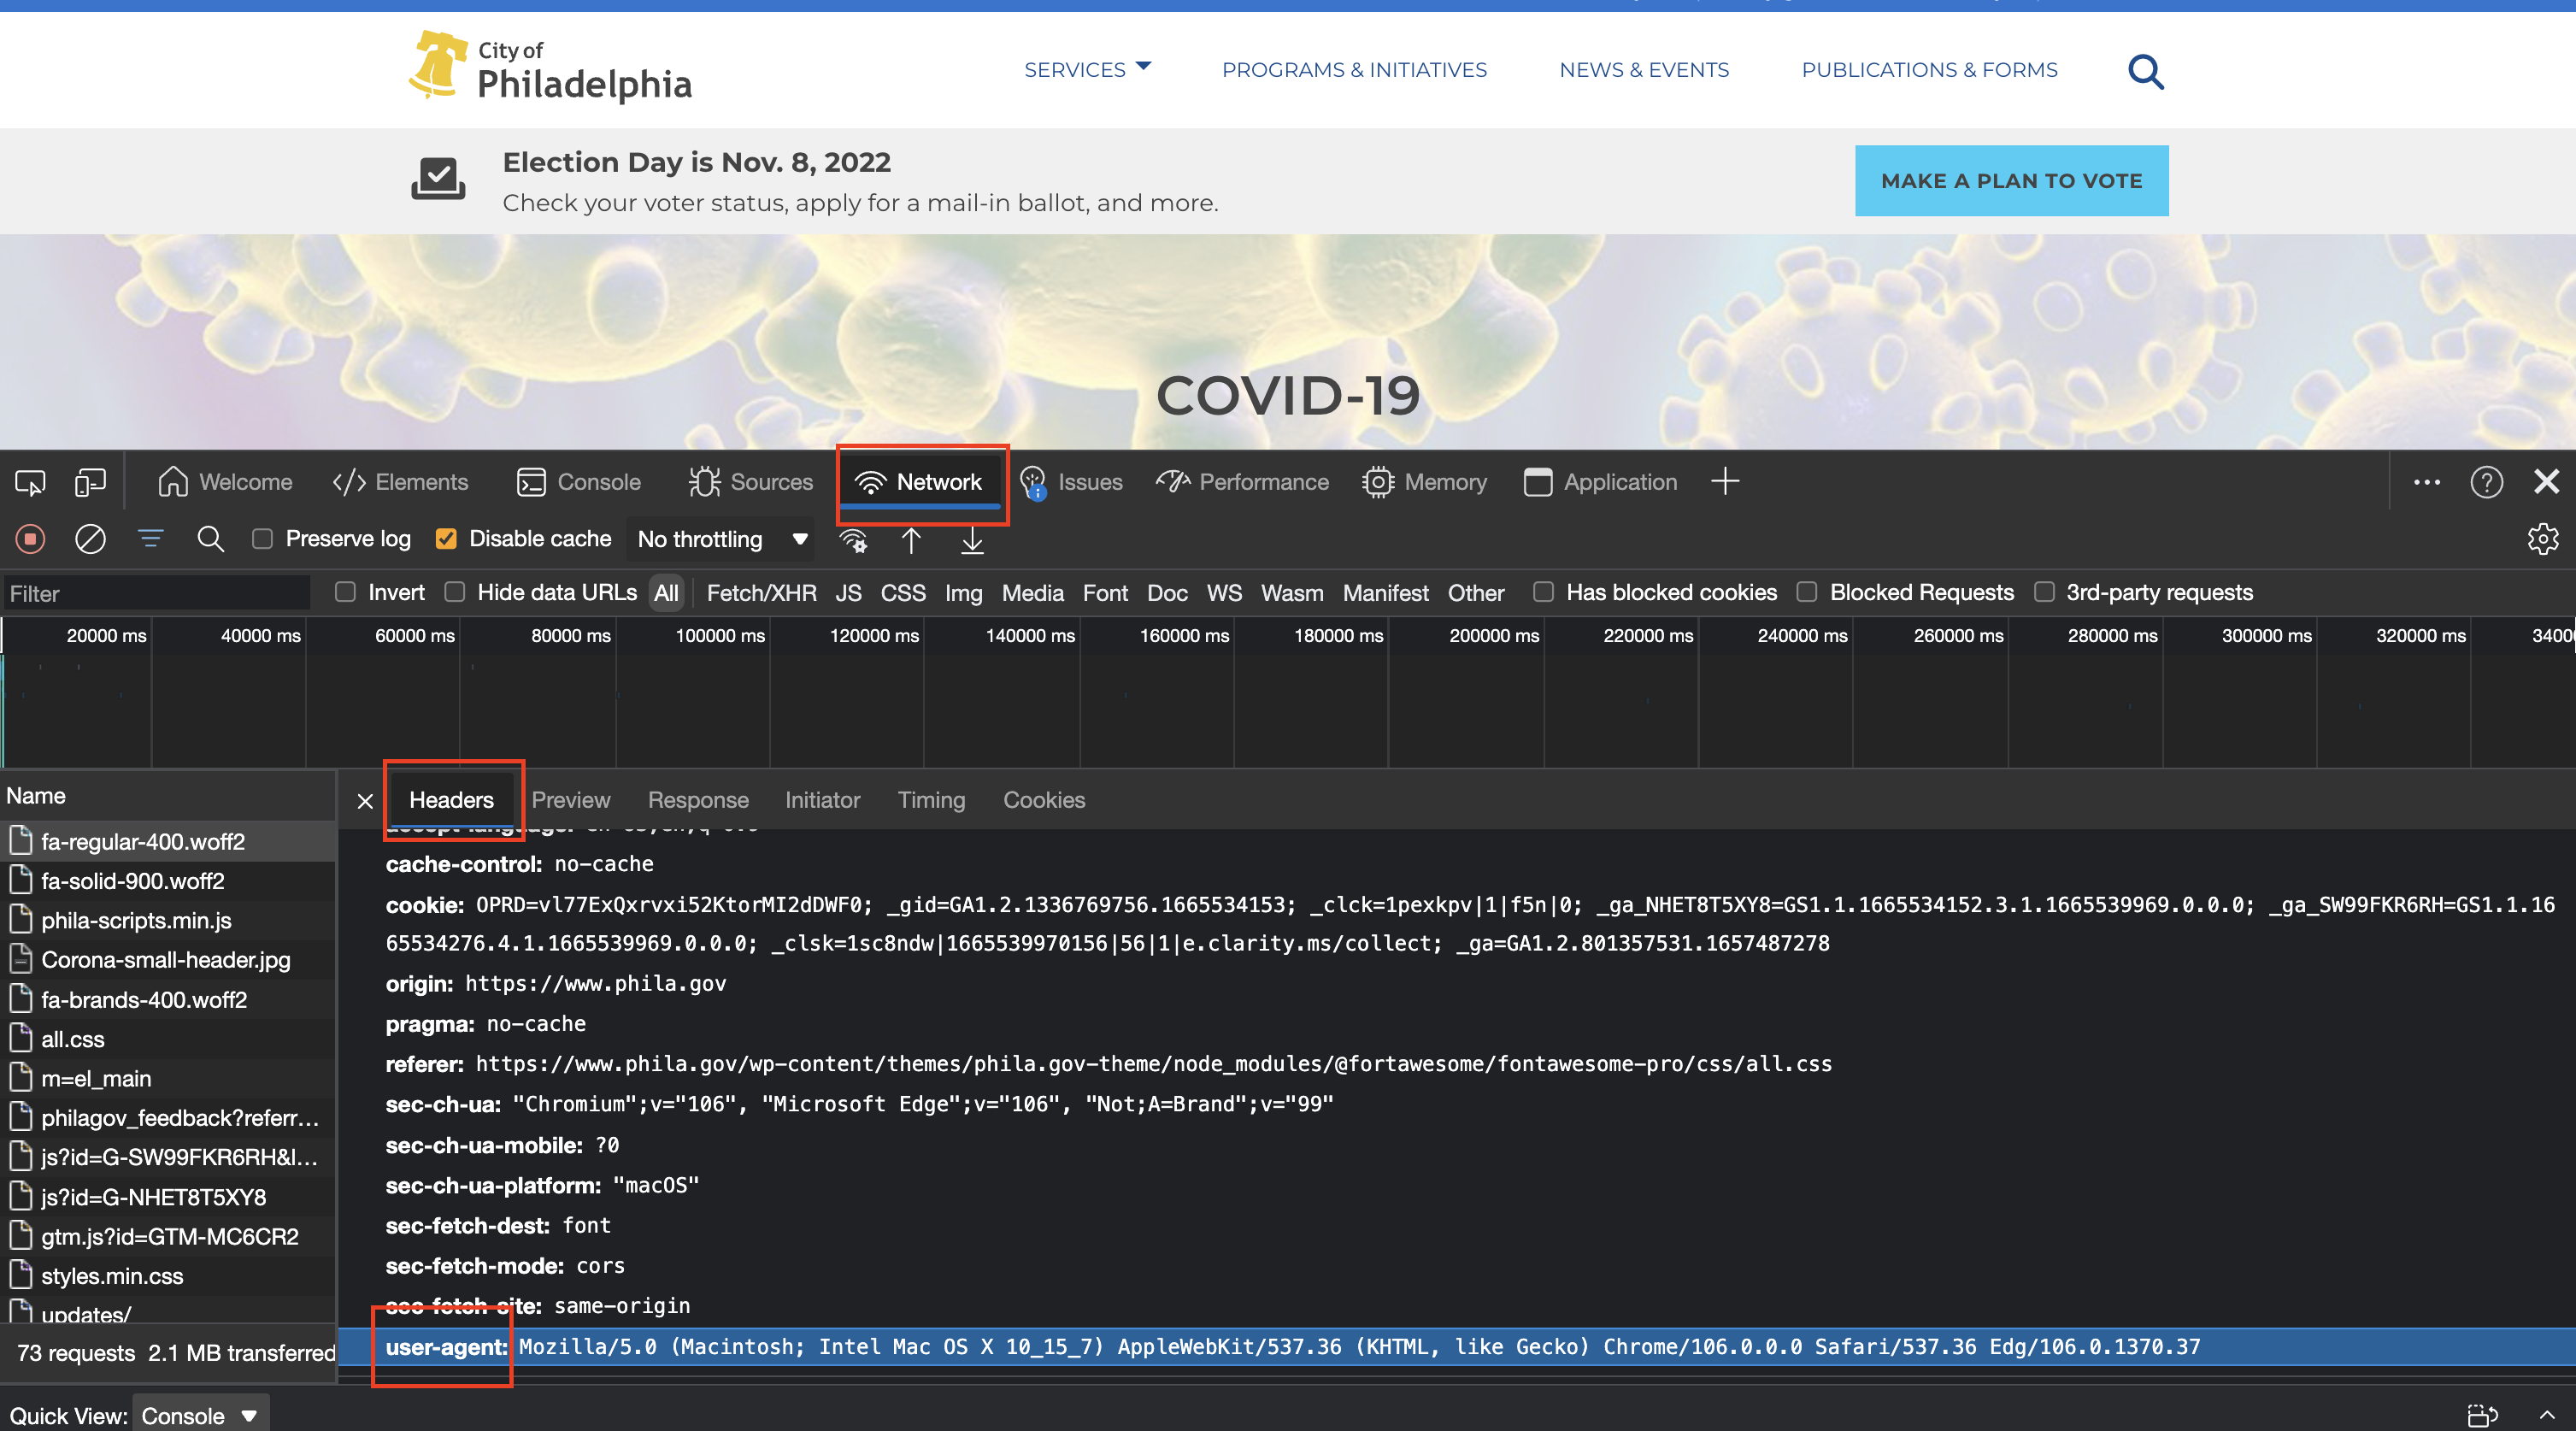

### Example: Let's get COVID-19 stats in Philadelphia

In [80]:
url = "https://www.phila.gov/programs/coronavirus-disease-2019-covid-19/updates/"

In [92]:
user_agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36 Edg/106.0.1370.37"

In [94]:
result = requests.get(url, headers={"User-Agent": user_agent}) # NEW: Specify the "User-Agent" header
soup = BeautifulSoup(result.content, "html.parser")

#### Get the average case count

Use the web inspector to identify the correct CSS selector (right click -> Inspect and then right click -> Copy -> Copy Selector)

In [95]:
selector = "#post-263624 > div.one-quarter-layout > div:nth-child(1) > div.medium-18.columns.pbxl > ul > li:nth-child(1)"

Select the element using the CSS selector and get the text:

In [98]:
avg = soup.select_one(selector).text

In [99]:
avg

'Average new cases per day: 177'

Split the string into words:

In [100]:
words = avg.split()

words

['Average', 'new', 'cases', 'per', 'day:', '177']

Get the last element and convert to an integer:

In [91]:
int(words[-1])

177

#### Get the last updated date

In [151]:
selector = "#post-263624 > div.one-quarter-layout > div:nth-child(1) > div.medium-18.columns.pbxl > p:nth-child(3) > em"

In [152]:
last_updated = soup.select_one(selector).text

last_updated

'Cases last updated: October 4, 2022\nHospitalizations last updated: September 28, 2022'

Break into lines: 

In [107]:
lines = last_updated.splitlines()

lines

['Cases last updated: October 4, 2022',
 'Hospitalizations last updated: September 28, 2022']

Split by the colon:

In [110]:
lines[0].split(":")

['Cases last updated', ' October 4, 2022']

In [114]:
last_updated_date = lines[0].split(":")[-1]

last_updated_date

' October 4, 2022'

Convert to a timestamp:

In [120]:
timestamp = pd.to_datetime(last_updated_date)

timestamp

Timestamp('2022-10-04 00:00:00')

In [157]:
timestamp.strftime("%B %-d, %Y")

'October 4, 2022'

## Part 1: Web scraping exercises

Even more: [101 Web Scraping Exercises](https://github.com/stanfordjournalism/search-script-scrape)

For each of the exercises, use the Web Inspector to inspect the structure of the relevant web page, and identify the HTML content you will need to scrape with Python.

### 1. The number of days until the General Election

- Relevant URL: https://vote.phila.gov/
- **Hint:** select the <span> element that holds the number of days

### 2. Philadelphia City Council

A number of councilmembers have resigned in order for them to run for mayor in the spring. Let's find out how many seats are on Council and how many are currently vacant!

Determine two things: 

- The total number of City Council seats
- The total number of *vacant* City Council seats

Relevant URL: https://phlcouncil.com/council-members/


**Hints:**

- You will need to specify the "User-Agent" header, otherwise you will get a 403 Forbidden error
- The cards on the page flip, and the Councilmember names are listed on the front AND back. The content is separated and you should see "div" elements with "front" and "back" classes.
- When creating your CSS selector, use a *nested* selector that first selects the front content and then selects the name displayed on the card

### 3. Food inspections in Philadelphia

Extract the following: 
- the names and number of violations per inspection for food-borne risk factors (as a DataFrame)
- the total number of violations

**Note: we are looking for food-borne violations only, and not all restaurants listed will have food-borne violations listed**

Relevant URL: http://data.inquirer.com/inspections

## Part 2: What about dynamic content?

How do you scrape data that only appears after user interaction?

## Selenium

<center>
    <img src=attachment:Picture1.png width=700>
</center>
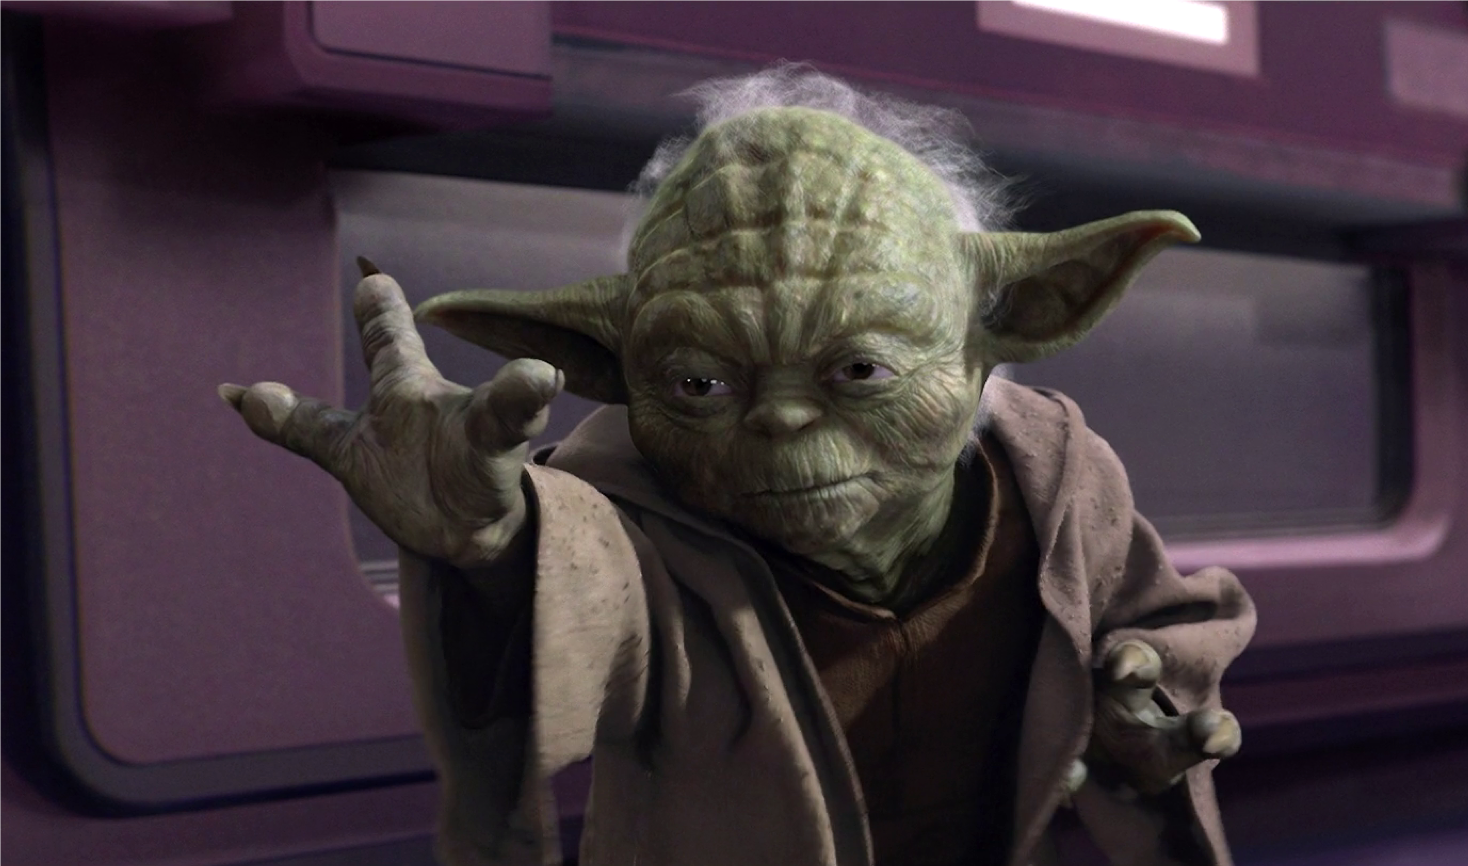

## Note: web browser needed

You'll need a web browser installed to use `selenium`, e.g., FireFox, Google Chrome, Edge, etc.

## Selenium 

- Designed as a framework for testing webpages during development
- Provides an interface to interact with webpages just as a user would 
- Becoming increasingly popular for web scraping dynamic content from pages

## Best by example: Scraping the Philadelphia Municipal Courts portal

- URL: https://ujsportal.pacourts.us/CaseSearch
- Given a Police incident number, we'll see if there is an associated court case with the incident

Selenium will open a web browser, load the page, and the browser will respond to the commands issued by selenium

In [35]:
# Import the webdriver from selenium
from selenium import webdriver

## Initialize the driver

The initialization steps will depend on which browser you want to use!

## Important: Working on Binder

If you are working on Binder, you'll need to use FireFox in "headless" mode, which prevents a browser window from opening.

If you are working locally, it's better to run with the default options — you'll be able to see the browser window open and change as we perform the web scraping.

### Using Google Chrome

In [36]:
# UNCOMMENT BELOW TO USE CHROME

# from webdriver_manager.chrome import ChromeDriverManager
# from selenium.webdriver.chrome.service import Service


# driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

### Using Firefox

If you are working on Binder, use the below code!

In [53]:
# UNCOMMENT BELOW IF ON BINDER

# from webdriver_manager.firefox import GeckoDriverManager
# from selenium.webdriver.firefox.service import Service

# options = webdriver.FirefoxOptions()

# IF ON BINDER, RUN IN "HEADLESS" MODE (NO BROWSER WINDOW IS OPENED)
# COMMENT THIS LINE IF WORKING LOCALLY
# options.add_argument("--headless")

# Initialize
# driver = webdriver.Firefox(service=Service(GeckoDriverManager().install()), options=options)

### Using Microsoft Edge

In [51]:
# UNCOMMENT BELOW TO USE MICROSOFT EDGE

# from webdriver_manager.microsoft import EdgeChromiumDriverManager
# from selenium.webdriver.edge.service import Service

# driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))

## Run the scraping analysis

Strategy:

- Rely on the Web Inspector to identify specific elements of the webpage
- Use Selenium to interact with the webpage
    - Change dropdown elements
    - Click buttons

### 1. Open the URL

In [10]:
# Open the URL
url = "https://ujsportal.pacourts.us/CaseSearch"
driver.get(url)

### 2. Create a dropdown "Select" element

We'll need to: 
- Select the dropdown element on the main page by its ID
- Initialize a `selenium` `Select()` object

In [16]:
from selenium.webdriver.common.by import By

In [17]:
# Use the Web Inspector to get the css selector of the dropdown select element
dropdown_selector = "#SearchBy-Control > select"

In [18]:
# Select the dropdown by the element's CSS selector
dropdown = driver.find_element(By.CSS_SELECTOR, dropdown_selector)

In [19]:
from selenium.webdriver.support.ui import Select

# Initialize a Select object
dropdown_select = Select(dropdown)

### 3. Change the selected text in the dropdown

Change the selected element: "Police Incident/Complaint Number" 

In [20]:
# Set the selected text in the dropdown element
dropdown_select.select_by_visible_text("Incident Number")

### 4. Set the incident number 

In [22]:
# Get the input element for the DC number
incident_input_selector = "#IncidentNumber-Control > input"
incident_input = driver.find_element(By.CSS_SELECTOR, incident_input_selector)

In [23]:
# Clear any existing entry
incident_input.clear()

# Input our example incident number
incident_input.send_keys("1725088232")

### 5. Click the search button!

In [25]:
# Submit the search
search_button_id = "btnSearch"
driver.find_element(By.ID, search_button_id).click()

### 6. Use BeautifulSoup to parse the results

- Use the `page_source` attribute to get the current HTML displayed on the page
- Initialize a "soup" object with the HTML

In [26]:
courtsSoup = BeautifulSoup(driver.page_source, "html.parser")

- Identify the element holding all of the results
- Within this container, find the `<table>` element and each `<tr>` element within the table

In [27]:
# Select the results container by its ID 
results_table = courtsSoup.select_one("#caseSearchResultGrid")

In [28]:
# Get all of the <tr> rows inside the tbody element 
# NOTE: we using nested selections here!
results_rows = results_table.select("tbody > tr")

**Example:** The number of court cases

In [29]:
# Number of court cases
number_of_cases = len(results_rows)
print(f"Number of courts cases: {number_of_cases}")

Number of courts cases: 2


**Example:** Extract the text elements from the first row of the results

In [30]:
first_row = results_rows[0]

In [31]:
print(first_row.prettify())

<tr class="slide-active">
 <td class="display-none">
  1
 </td>
 <td class="display-none">
  0
 </td>
 <td>
  MC-51-CR-0030672-2017
 </td>
 <td>
  Common Pleas
 </td>
 <td>
  Comm. v. Velquez, Victor
 </td>
 <td>
  Closed
 </td>
 <td>
  10/13/2017
 </td>
 <td>
  Velquez, Victor
 </td>
 <td>
  09/05/1974
 </td>
 <td>
  Philadelphia
 </td>
 <td>
  MC-01-51-Crim
 </td>
 <td>
  U0981035
 </td>
 <td>
  1725088232-0030672
 </td>
 <td>
  1725088232
 </td>
 <td class="display-none">
 </td>
 <td class="display-none">
 </td>
 <td class="display-none">
 </td>
 <td class="display-none">
 </td>
 <td>
  <div class="grid inline-block">
   <div>
    <div class="inline-block">
     <a class="icon-wrapper" href="/Report/CpDocketSheet?docketNumber=MC-51-CR-0030672-2017&amp;dnh=%2FGgePQykMpAymRENgxLBzg%3D%3D" target="_blank">
      <img alt="Docket Sheet" class="icon-size" src="https://ujsportal.pacourts.us/resource/Images/svg-defs.svg?v=3-Me4WMBYQPCgs0IdgGyzeTEx_qd5uveL0qyDZoiHPM#icon-document-letter-D" 

In [32]:
# Extract out all of the "<td>" cells from the first row
td_cells = first_row.select("td")

# Loop over each <td> cell
for cell in td_cells:
    
    # Extract out the text from the <td> element
    text = cell.text
    
    # Print out text
    if text != "":
        print(text)

1
0
MC-51-CR-0030672-2017
Common Pleas
Comm. v. Velquez, Victor
Closed
10/13/2017
Velquez, Victor
09/05/1974
Philadelphia
MC-01-51-Crim
U0981035
1725088232-0030672
1725088232
Docket SheetCourt Summary


### 7. Close the driver!

In [33]:
driver.close()

## Part 3: Automated "git scraping"

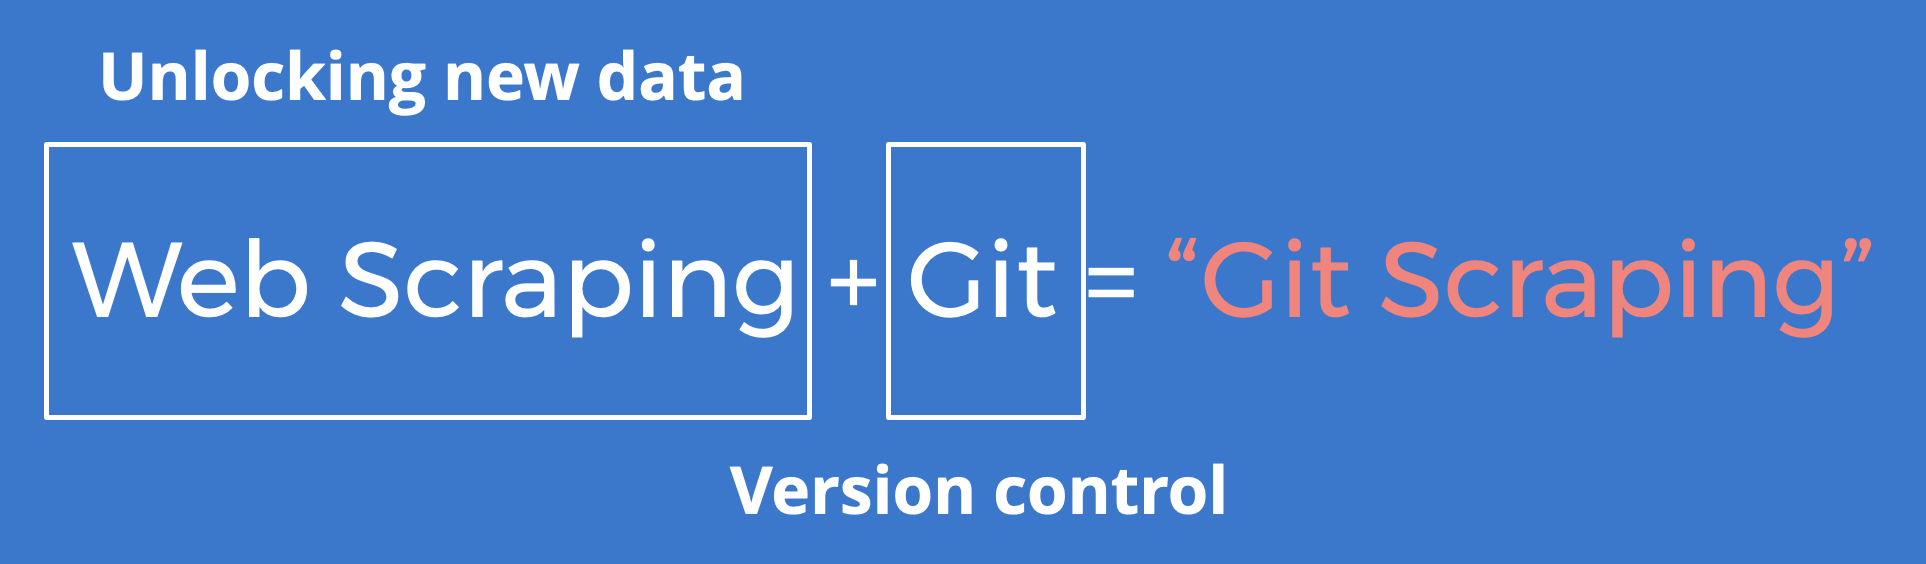

Coined by Simon Willison in [this blog post](https://simonwillison.net/2020/Oct/9/git-scraping/)

### Example: @PHLHomicides

Current YTD homicide total updates daily on the [Police Department’s website](https://www.phillypolice.com/crime-maps-stats/)

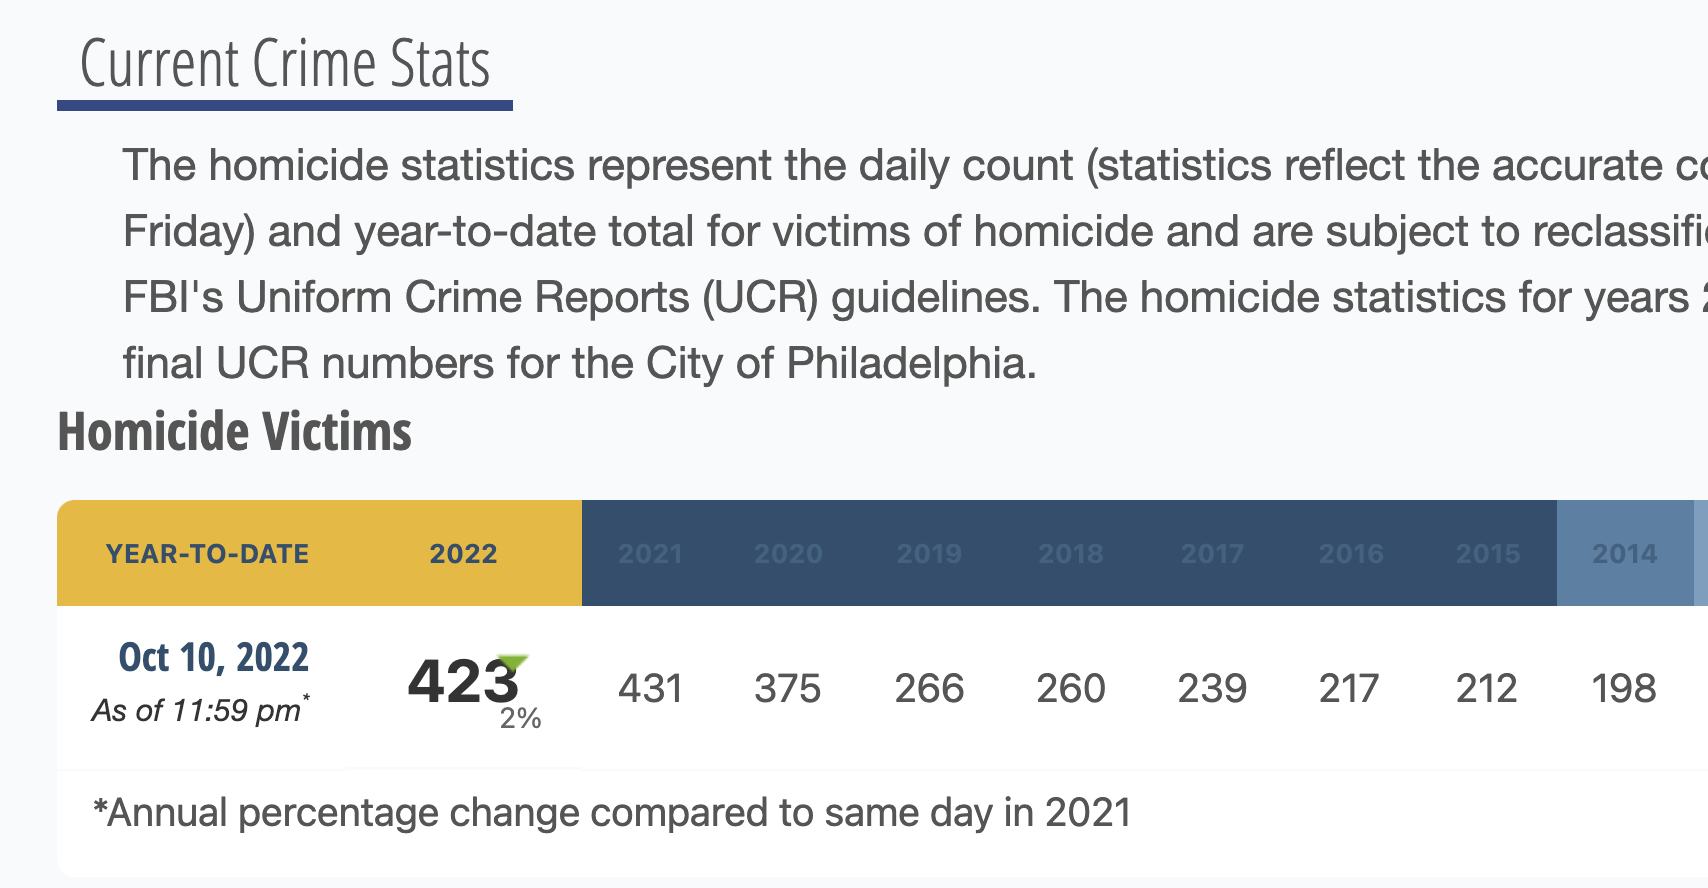

Data is scraped daily, saved to a CSV file, and added to a Github repository

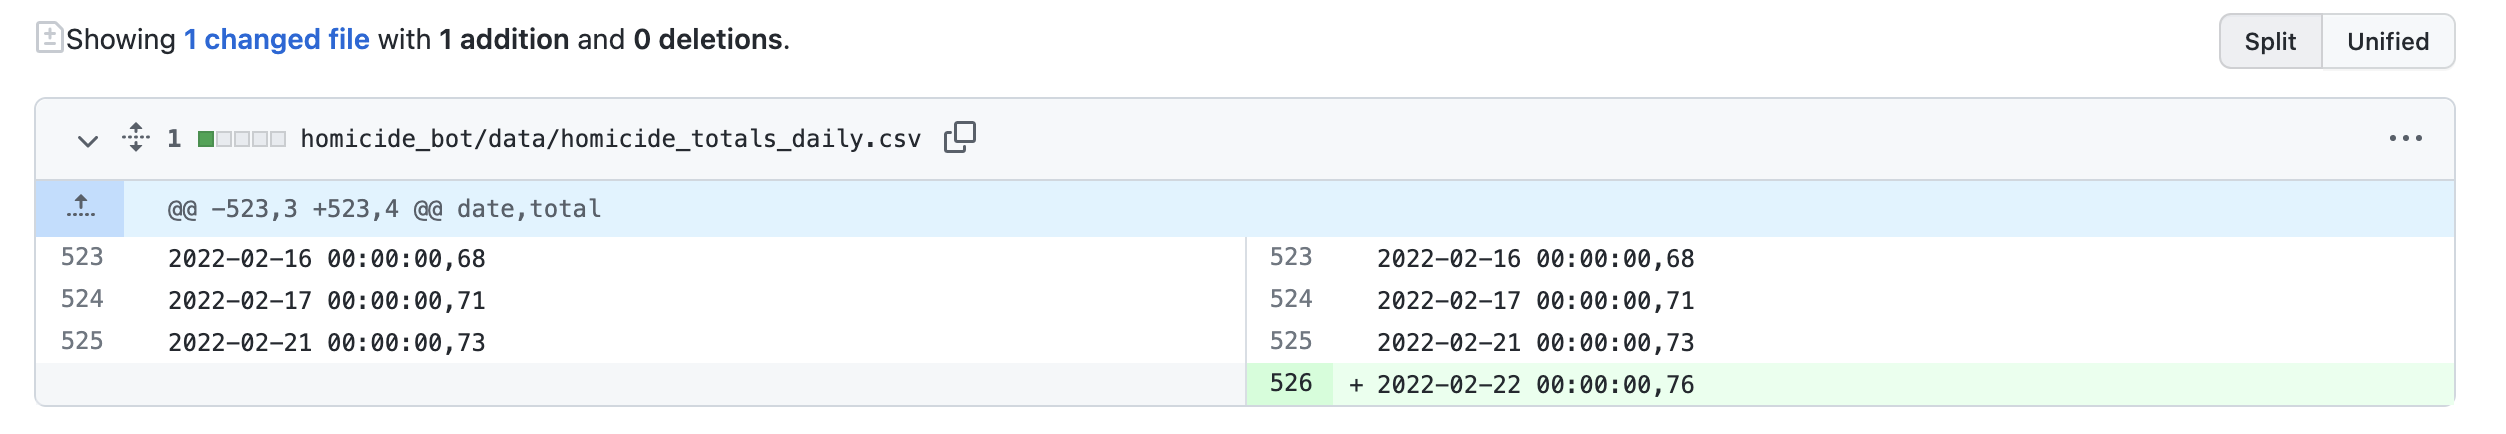

Data is then tweeted daily, providing an easily accessible record of homicides over time

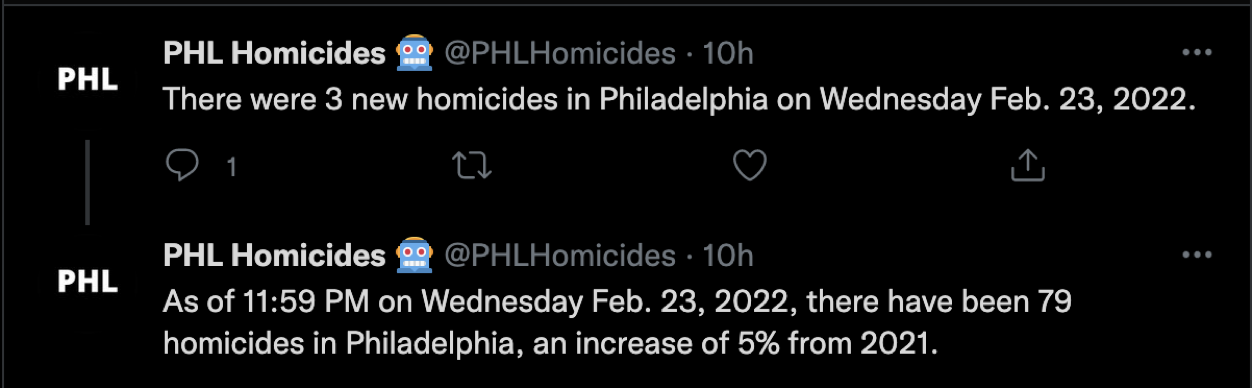

Source code is available on Github at [nickhand/phl-homicide-bot](https://github.com/nickhand/phl-homicide-bot)

### Example: Building a Twitter bot for COVID-19 stats 🤖

Key features:
- Web scraping
- Twitter API
- Automation

Example repo available at: [https://github.com/MUSA-550-Fall-2022/covid-stats-bot](https://github.com/MUSA-550-Fall-2022/covid-stats-bot)

### What it does

1. Scrape COVID case count from phila.gov using same code as first example today
1. Check if data is newer than the latest saved data
1. If it is, send a tweet with the info and update the saved CSV file

Use *Github Actions* to run this workflow once a day

### Github Actions

- Lots of good documentation to get you up and running quickly: [https://docs.github.com/en/actions](https://docs.github.com/en/actions)
- Allows you to run a pre-defined set of steps (including a python script) on a set schedule (daily, weekly, etc)
- Generous time/CPU limitations as long as your repo is public

### Github Actions

- Scheduled tasks are run via a workflow '.yml' file — these are the instructions!
- [See example file in repo](https://github.com/MUSA-550-Fall-2022/covid-stats-bot/blob/main/.github/workflows/update.yml) in the .github/workflows folder

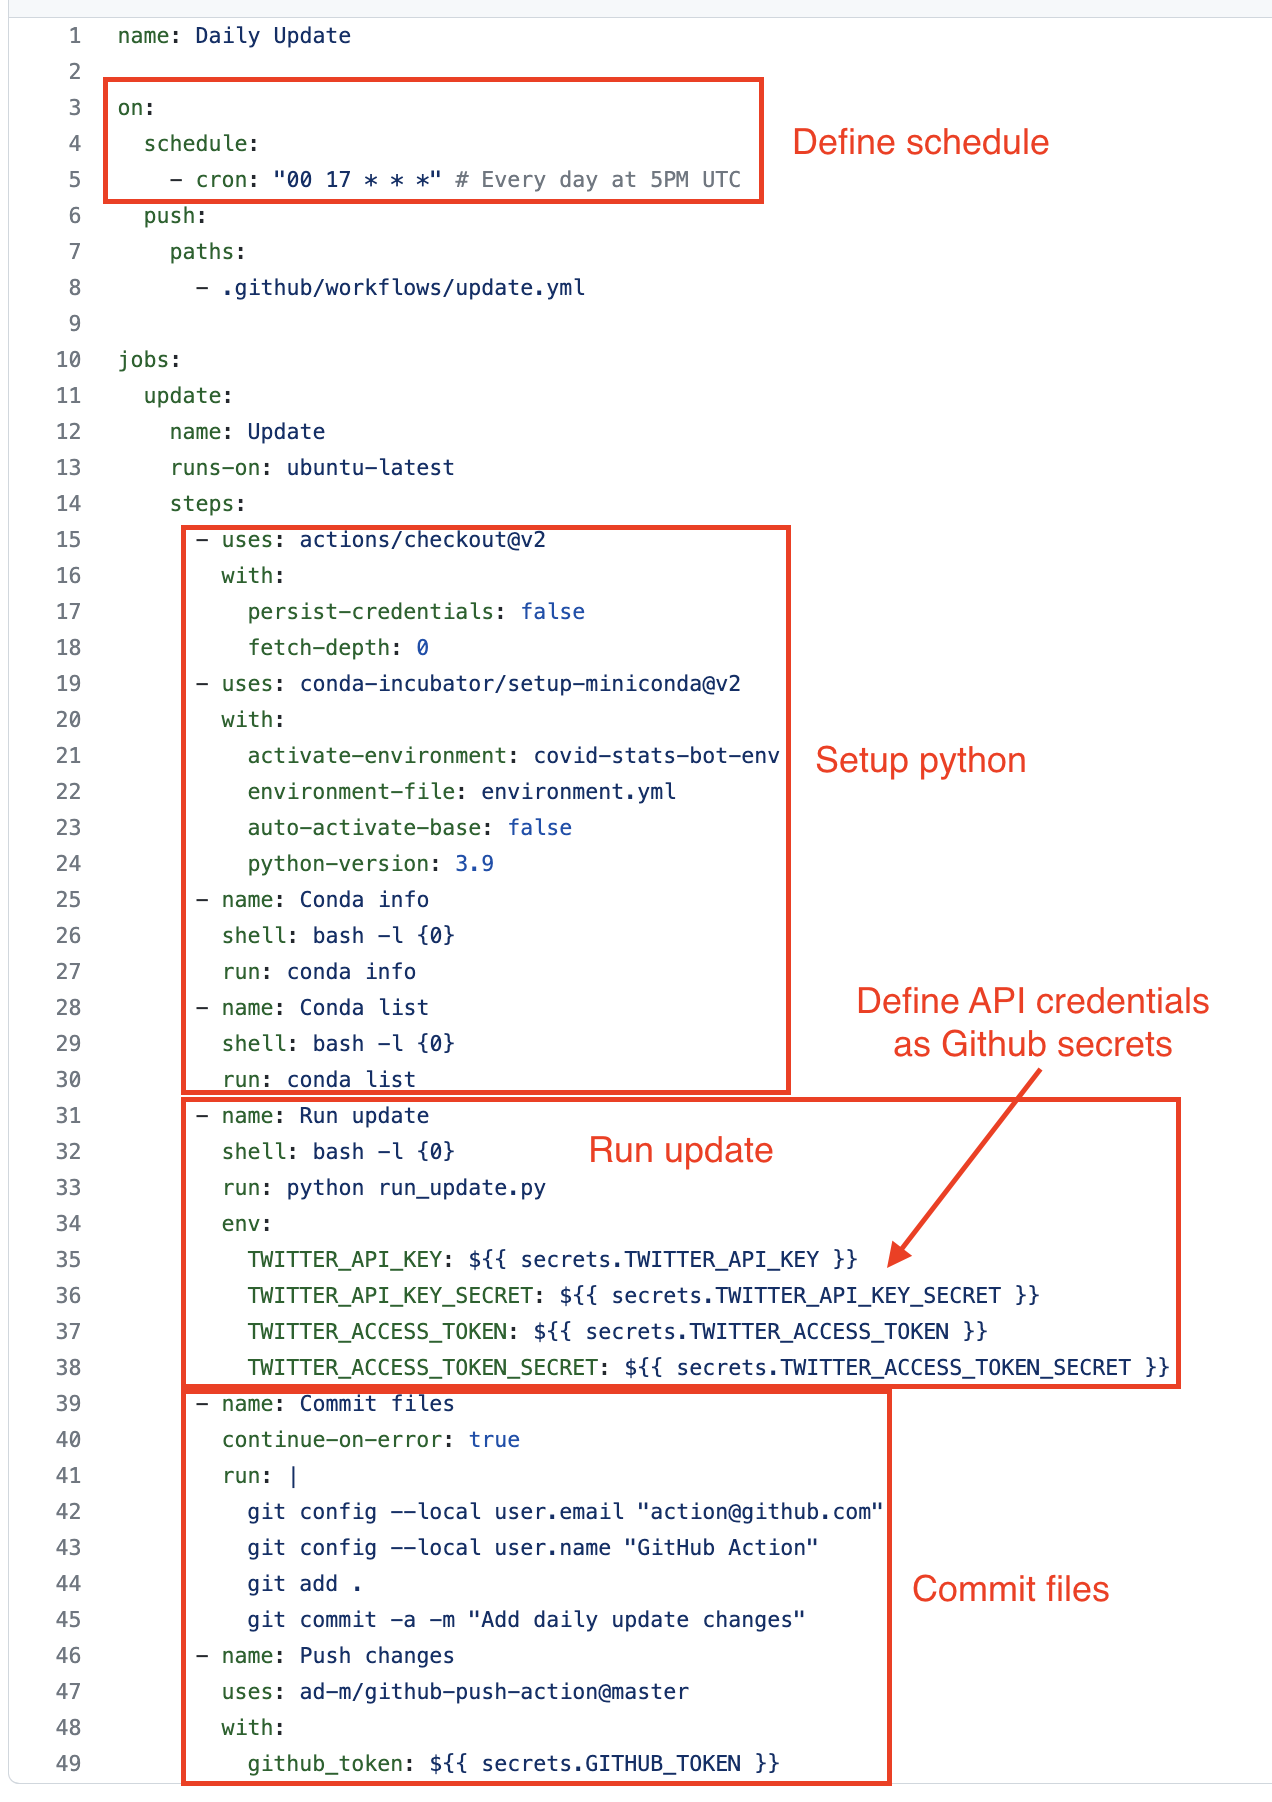

### Github secrets

- If you have API credentials (such as those for Twitter) you should **never** commit them to Github directly
- Instead, store them as *secrets* in the repository
- Go to settings -> secrets -> new repository secret

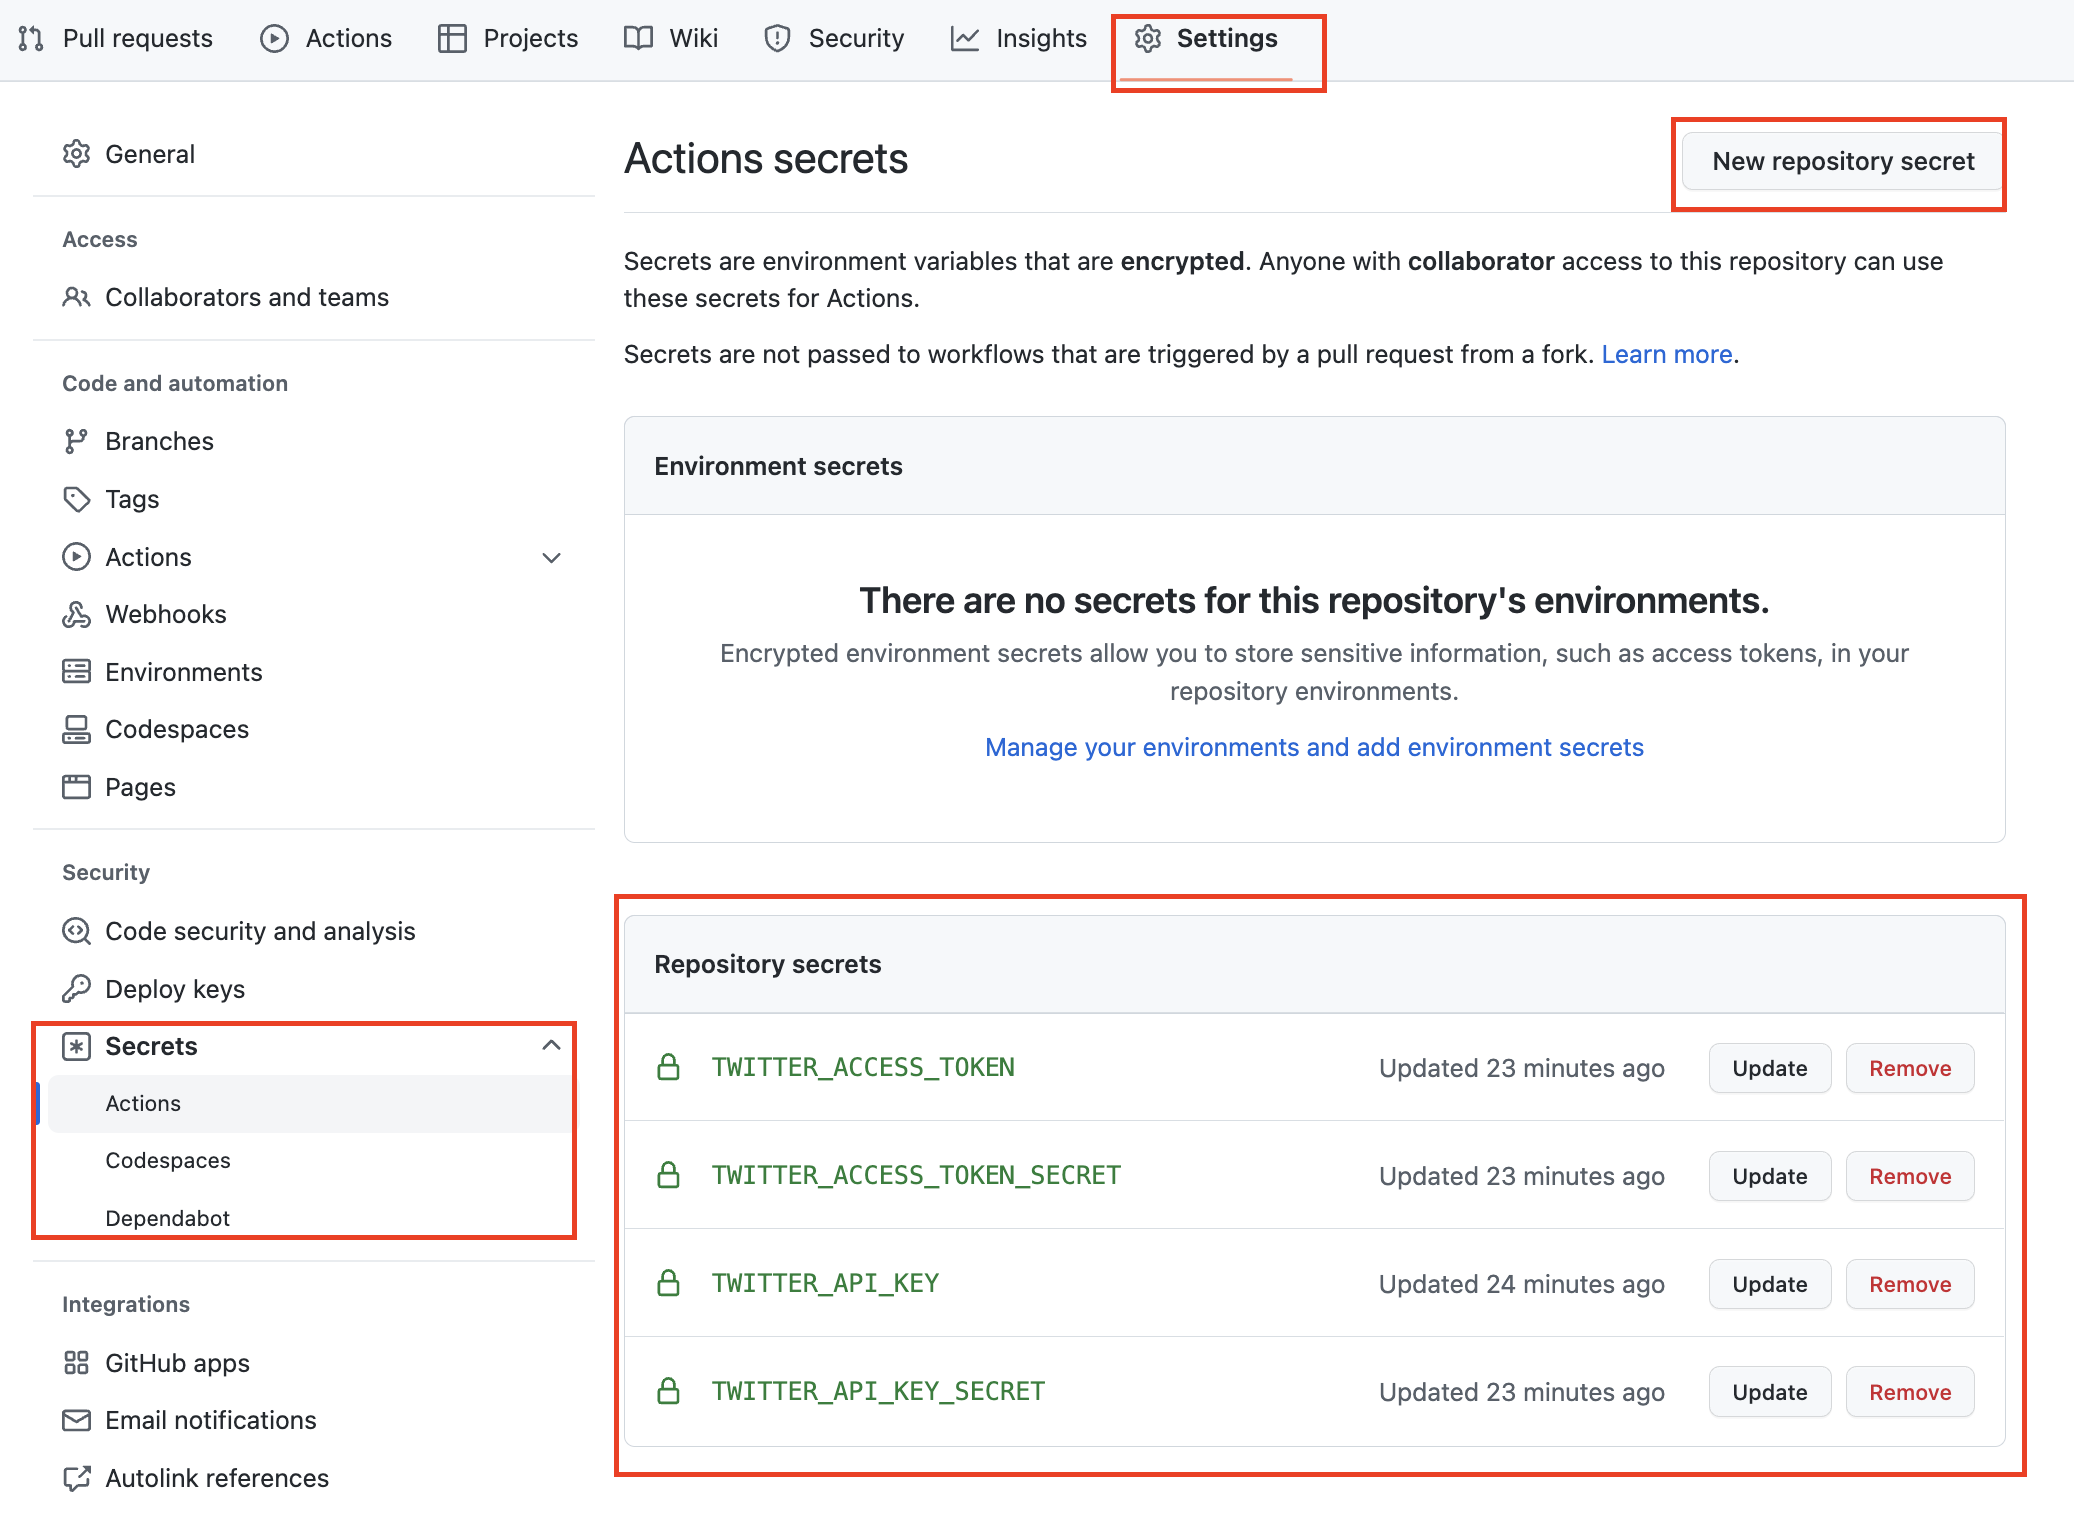

This will allow you to pass your Twitter API credentials to `tweepy` with compromising security and storing them in plaintext on Github!

### The final bot

Data is tracked and updated over time in `data.csv`

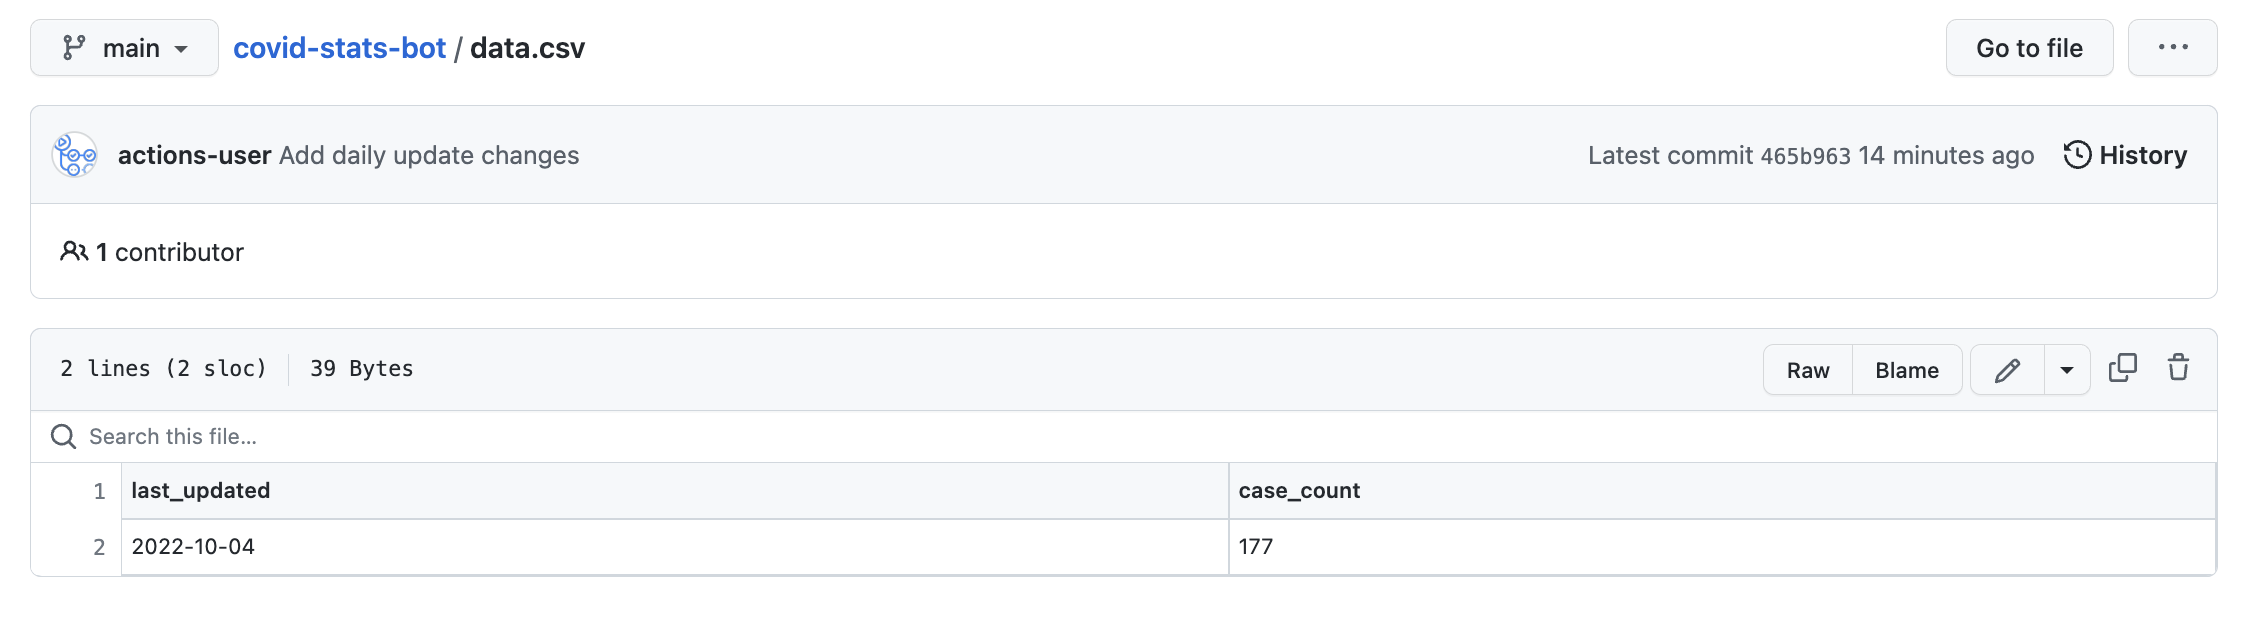

Info is also tweeted each time it is updated!

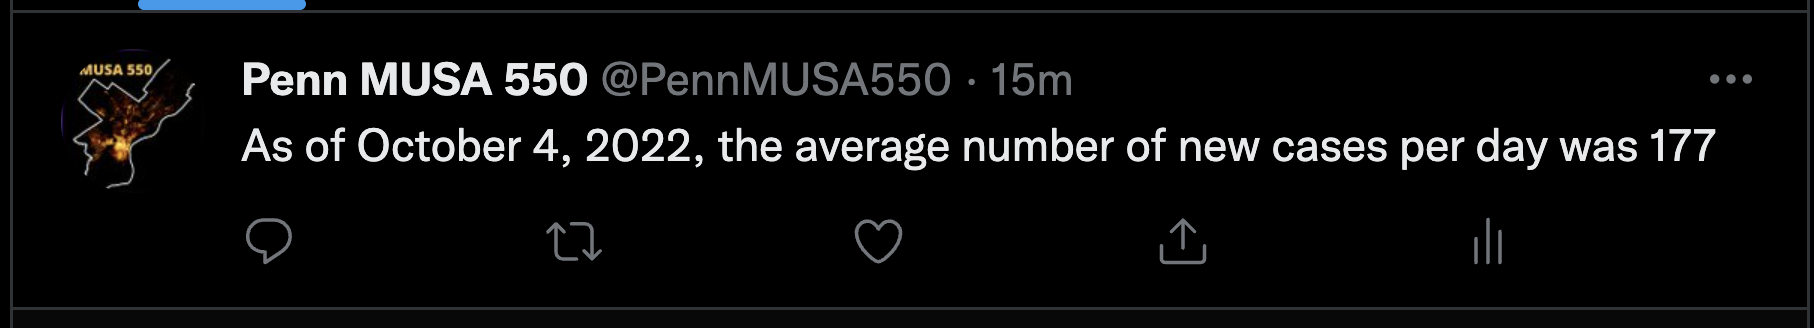

## That's it!

- Next week: working with "big" data
- See you on Monday!